In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import sys
sys.path.append('../')
sys.argv=[''] 
del sys

In [31]:
import os
os.environ['CUDA_DEVICES_VISIBLE']='0'

In [32]:
cd "/root/SymmNeRF-baseline/code"

/root/SymmNeRF-baseline/code


### Try to use another encoder. 

In [6]:
!pip install segmentation-models-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 27.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=43d19bf2959843d8a52d359169e5831b61d782e993d66fcc7e1ef20700d6cc25
  Stored in directory: /root/.cache/pip/wheels/29/16/24/752e89d88d333af39a288421e64d613b5f652918e39ef1f8e3
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60963 sha256=9b7e4a9c7a262a302c83c6aae231ad5c13d2ce903e609762dc0e420fbdec8dfa
  Stored in directory: /root/.cache/pip/wheels/d1/3b/4e/2f3015f1ab76f34be28e04c4bcee27e8cabfa70d2eadf8bc3b
Successfully built efficientnet-pytorch pretrainedmodels
  Attempting uninstall: timm
    Found existing installa

In [33]:
import torch
from segmentation_models_pytorch.decoders.deeplabv3 import model as dlv3


In [34]:
model = dlv3.DeepLabV3Plus()

In [48]:
import imageio
img = imageio.imread('/data/srn_cars/cars_train/a6842a04cef3e5ce69a949ac99a843c4/rgb/000007.png')[...,:-1]/255.
#x = torch.zeros([1,3,128,128])
x = torch.from_numpy(img).unsqueeze(0)
x = torch.permute(x,(0,-1,1,2))

x = x.type(torch.FloatTensor)

T = model.encoder
featmap = T(x)

/tmp/ipykernel_1697/2527041606.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('/data/srn_cars/cars_train/a6842a04cef3e5ce69a949ac99a843c4/rgb/000007.png')[...,:-1]/255.


In [49]:
for f in featmap:
    print(f.shape)

torch.Size([1, 3, 128, 128])
torch.Size([1, 64, 64, 64])
torch.Size([1, 64, 32, 32])
torch.Size([1, 128, 16, 16])
torch.Size([1, 256, 8, 8])
torch.Size([1, 512, 8, 8])


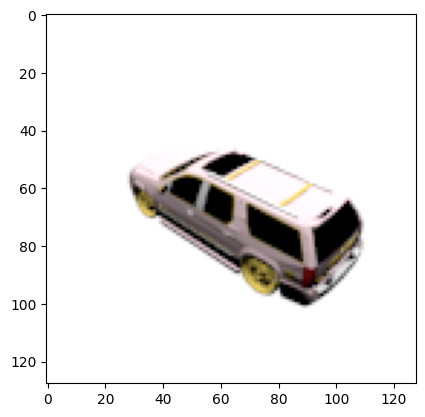

In [55]:
import matplotlib.pyplot as plt
import numpy as np 

feat1 = featmap[0][0,...].detach().numpy()
feat1 = np.transpose(feat1,(1,2,0))

plt.figure()
plt.imshow(feat1)
plt.show()

In [24]:
from model.feature_network import ResNetSymmLocal,BasicBlock

In [28]:
model_baseline = ResNetSymmLocal(BasicBlock,[3,4,6,3])

featmap_baseline = model_baseline(x)

Shape of latent i: torch.Size([1, 64, 64, 64])
Shape of latent i: torch.Size([1, 64, 32, 32])
Shape of latent i: torch.Size([1, 128, 16, 16])
Shape of latent i: torch.Size([1, 256, 8, 8])
